# Prepairing

## inSTAR PLATINum

In [ ]:
#metrics
!pip install -q git+https://github.com/google-research/bleurt.git
!pip install -q bert_score
!pip install -q rouge-score

#hugging
!pip install -q datasets

#keras
!pip install -q --upgrade keras-nlp
!pip install -q --upgrade keras

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 897.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.

## config

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "torch"
import keras_nlp
import keras

import numpy as np

import torch
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cpu')

## random

In [ ]:
SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
keras.utils.set_random_seed(SEED)

## models

In [ ]:
opt_types = list(keras_nlp.models.OPTBackbone.presets.keys())
print(opt_types)
OPT = opt_types[0]

['opt_125m_en', 'opt_1.3b_en', 'opt_2.7b_en', 'opt_6.7b_en']


## constraints

In [ ]:
DIR_CONSTRAINTS_PATH = '/content/drive/My Drive/Colab Notebooks/NLP_models_qa_testing/text-generation/constraints/'

# Datasets

In [ ]:
import datasets

## datasets

In [ ]:
SQUAD_V2 = "squad_v2"
SQL_CONTEXT = "b-mc2/sql-create-context"
ADVERSARIAL_QA = "adversarial_qa"

In [ ]:
squad2 = datasets.load_dataset(SQUAD_V2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [ ]:
sql = datasets.load_dataset(SQL_CONTEXT)

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
adversarial_qa = datasets.load_dataset(ADVERSARIAL_QA, 'adversarialQA')

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
squad2['train'].to_pandas().loc[0:0]

,id,title,context,question,answers
0,56be85543aeaaa14008c9063,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,"{'text': ['in the late 1990s'], 'answer_start'..."


In [ ]:
sql['train'].to_pandas().loc[0:0]

,answer,question,context
0,SELECT COUNT(*) FROM head WHERE age > 56,How many heads of the departments are older th...,CREATE TABLE head (age INTEGER)


In [ ]:
adversarial_qa['train'].to_pandas().loc[0:0]

,id,title,context,question,answers,metadata
0,7ba1e8f4261d3170fcf42e84a81dd749116fae95,Brain,Another approach to brain function is to exami...,What sare the benifts of the blood brain barrir?,"{'text': ['isolated from the bloodstream'], 'a...","{'split': 'train', 'model_in_the_loop': 'Combi..."


## tokenizers

In [ ]:
opt_tokenizer = keras_nlp.models.OPTTokenizer.from_preset(OPT)

INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/opt/keras/opt_125m_en/2/download/tokenizer.json...
100%|██████████| 443/443 [00:00<00:00, 87.6kB/s]
INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/opt/keras/opt_125m_en/2/download/assets/tokenizer/merges.txt...
100%|██████████| 446k/446k [00:00<00:00, 3.68MB/s]
INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/opt/keras/opt_125m_en/2/download/assets/tokenizer/vocabulary.json...
100%|██████████| 0.99M/0.99M [00:00<00:00, 7.46MB/s]


## preprocess of data

In [ ]:
MAX_TOKENS = 128

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
def get_entire_dataset(dataset, names_arr):
  df_list = [dataset[name].to_pandas() for name in names_arr]
  return pd.concat(df_list)

In [ ]:
squad2 = get_entire_dataset(squad2, ['train','validation'])
sql = get_entire_dataset(sql, ['train'])
adversarial_qa = get_entire_dataset(adversarial_qa, ['train','validation','test'])

In [ ]:
def extract_answer(answer_dict):
    text_list = answer_dict.get('text', [])
    non_empty_text_list = [text for text in text_list if text]
    return non_empty_text_list[0] if non_empty_text_list else None

In [ ]:
ANSWER = 'answer'
CONTEXT = 'context'
QUESTION = 'question'

SPLITS = ['train', 'validation', 'test']

for dataset in [squad2, adversarial_qa]:
  dataset[ANSWER] = dataset['answers'].apply(extract_answer)
  dataset.dropna(subset=[ANSWER], inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def constraints_qa(dataset, name):
  conditions = np.load(f'{DIR_CONSTRAINTS_PATH}{name}.npy')
  dataset = dataset[conditions]
  print(f"Current length: {len(dataset)}")
  return dataset

In [ ]:
squad2 = constraints_qa(squad2,"squad2")

Current length: 6989


In [ ]:
sql = constraints_qa(sql, "sql")

Current length: 76432


In [ ]:
adversarial_qa = constraints_qa(adversarial_qa, "adversarial_qa")

Current length: 3242


In [ ]:
def split_to_valid_test(dataset, valid, test):
  train, validation_and_test = train_test_split(dataset, test_size=valid+test)
  valid, test = train_test_split(validation_and_test, test_size=test/(valid + test))
  new_dataset = {
      'train': datasets.Dataset.from_dict(train),
      'validation': datasets.Dataset.from_dict(valid),
      'test': datasets.Dataset.from_dict(test)
  }
  return new_dataset

In [ ]:
squad2 = split_to_valid_test(squad2, 0.1, 0.1)
sql = split_to_valid_test(sql, 0.1, 0.1)
adversarial_qa = split_to_valid_test(adversarial_qa, 0.1, 0.1)

In [ ]:
import math
def save_percent_dataset(dataset, percent):
  num_shards = math.ceil(100/percent)

  for split in SPLITS:
    dataset[split] = dataset[split].shuffle(seed=SEED)
    dataset[split] = dataset[split].shard(num_shards=num_shards, index=0)

  return dataset

In [ ]:
sql = save_percent_dataset(sql,10)

In [ ]:
squad2

{'train': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 5591
 }),
 'validation': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 699
 }),
 'test': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 699
 })}

In [ ]:
sql

{'train': Dataset({
     features: ['answer', 'question', 'context'],
     num_rows: 6115
 }),
 'validation': Dataset({
     features: ['answer', 'question', 'context'],
     num_rows: 765
 }),
 'test': Dataset({
     features: ['answer', 'question', 'context'],
     num_rows: 765
 })}

In [ ]:
adversarial_qa

{'train': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'metadata', 'answer'],
     num_rows: 2593
 }),
 'validation': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'metadata', 'answer'],
     num_rows: 324
 }),
 'test': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'metadata', 'answer'],
     num_rows: 325
 })}

## dict

In [ ]:
dataset_dict = {
    SQUAD_V2: squad2,
    SQL_CONTEXT: sql,
    ADVERSARIAL_QA: adversarial_qa,
}

# OPT

In [ ]:
FINETUNING_LEARNING_RATE = 1e-6
FINETUNING_EPOCHS = 3
BACKBONE_LAYER = 2
BACKBONE_PARTS_UNFROZEN = 5

START_TOKEN = 0 #<s>
END_TOKEN = 2 #<\s>
PAD_TOKEN = 1 #<pad>

SAMPLER = keras_nlp.samplers.GreedySampler()
LOSS = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
TRAIN_METRICS = keras.metrics.SparseCategoricalAccuracy()
BATCH_SIZE = 32

OPTIMAL_LR_EXAPLES_FROM_DATASETS = 32

GENERATE_BATCH_SIZE = 64

In [ ]:
opt_tokenizer.pad_token_id = PAD_TOKEN
opt_tokenizer.start_token_id = START_TOKEN
opt_tokenizer.end_token_id = END_TOKEN

## create preprocessors

In [ ]:
preprocessor_input = keras_nlp.models.OPTCausalLMPreprocessor(
  sequence_length=MAX_TOKENS,
  add_start_token=True,
  add_end_token=False,
  tokenizer=opt_tokenizer,
)

preprocessor_output = keras_nlp.models.OPTCausalLMPreprocessor(
  sequence_length=MAX_TOKENS,
  add_start_token=False,
  add_end_token=True,
  tokenizer=opt_tokenizer
)

## find optimal lr

In [ ]:
import math

In [ ]:
def percent_dataset(dataset, percent):
  num_data = len(dataset)

  subset_size = math.ceil(num_data * (percent / 100))

  data = []

  for i in range(subset_size):
      row = dataset[i]
      context = row[CONTEXT]
      question = row[QUESTION]
      answer = row[ANSWER]
      element = "context:" + context + " question:" + question + " answer:" + answer

      data.append(element)
  return data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def optimal_lr(dataset, model, prep_i, prep_o):
  data = percent_dataset(dataset, 100)

  inputs, _, _ = prep_i(data)
  outputs, _, _ = prep_o(data)
  outputs = outputs['token_ids']

  lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/25))
  model.compile(
      sampler=SAMPLER,
      loss=LOSS,
      optimizer=keras.optimizers.Adam(1e-8),
  )

  history = model.fit(
    x=inputs,
    y=outputs,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[lr_scheduler],
  )

  torch.cuda.empty_cache()

  lrs = 1e-8 * (10 ** (np.arange(100)/25))
  plt.figure(figsize=(10, 10))
  plt.semilogx(lrs, history.history["loss"])
  plt.xlabel("Learning Rate")
  plt.ylabel("Loss")
  plt.title("Learning rate vs. loss");
  plt.show()

In [ ]:
import random

In [ ]:
a_little_from_every_dataset = []
for dataset in dataset_dict.values():
  train = dataset['train']
  for i in range(0,OPTIMAL_LR_EXAPLES_FROM_DATASETS):
    rand = random.randint(1, len(train))-1
    a_little_from_every_dataset.append(train[rand])

In [ ]:
opt_max = keras_nlp.models.OPTCausalLM.from_preset(OPT, preprocessor=None)

100%|██████████| 420/420 [00:00<00:00, 359kB/s]
100%|██████████| 478M/478M [00:21<00:00, 23.3MB/s] 


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step - loss: 7.8130 - learning_rate: 1.0000e-08
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - loss: 7.7896 - learning_rate: 1.0965e-08
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - loss: 7.8161 - learning_rate: 1.2023e-08
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - loss: 7.7930 - learning_rate: 1.3183e-08
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - loss: 7.7911 - learning_rate: 1.4454e-08
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - loss: 7.7935 - learning_rate: 1.5849e-08
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - loss: 7.7993 - learning_rate: 1.7378e-08
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - loss: 7.7626 - learning_rate: 1.9055e-08
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - loss: 7.7691 - learning_rate: 2.0893e-08
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - loss: 7.7625 - learning_rate: 2.2909e-08
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - loss:

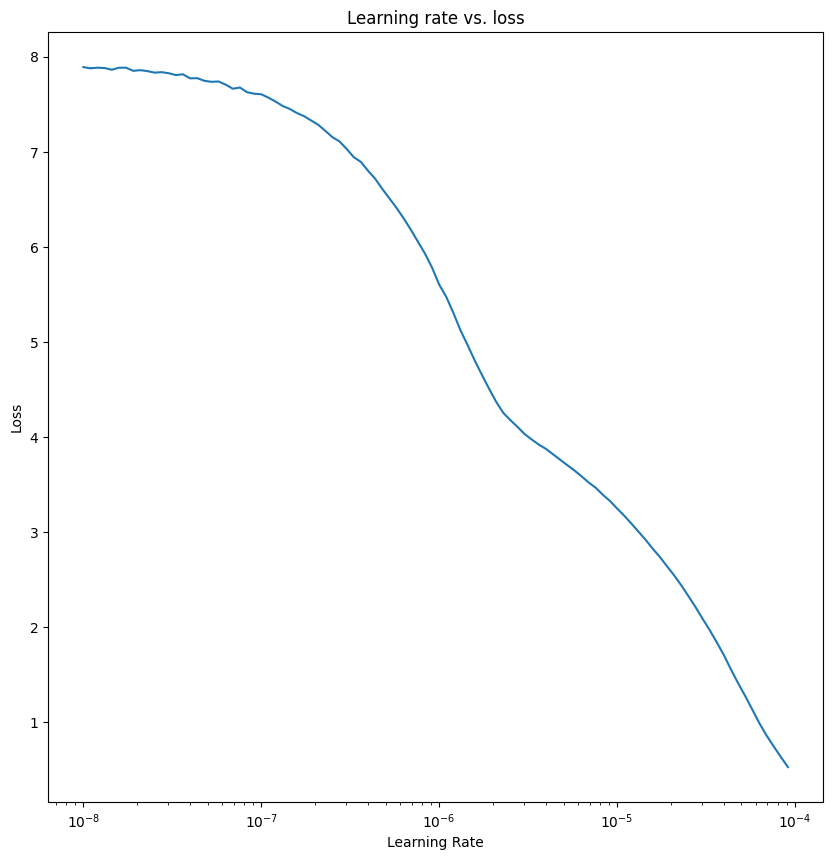

In [ ]:
optimal_lr(a_little_from_every_dataset, opt_max, preprocessor_input, preprocessor_output)

## train function

In [ ]:
import torch

def train(dataset, model, prep_i, prep_o, lr, epochs):
  data = percent_dataset(dataset['train'], 100)
  valid_data = percent_dataset(dataset['validation'], 100)

  inputs, _, _ = prep_i(data)
  outputs, _, _ = prep_o(data)
  outputs = outputs['token_ids']

  valid_inputs, _, _ = prep_i(valid_data)
  valid_outputs, _, _ = prep_o(valid_data)
  valid_outputs = valid_outputs['token_ids']

  model.compile(
    sampler=SAMPLER,
    loss=LOSS,
    optimizer=keras.optimizers.Adam(lr),
    metrics=[TRAIN_METRICS],
  )

  history = model.fit(
    inputs,
    outputs,
    epochs=epochs,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(valid_inputs, valid_outputs),
  )

  model.preprocessor = prep_i
  torch.cuda.empty_cache()
  return model

## froze the part of the model

In [ ]:
def froze_the_part(model):
  for layer in model.layers:
    layer.trainable = False

  backbone = model.layers[BACKBONE_LAYER]

  backbone.trainable = True

  for layer in backbone.layers:
    layer.trainable = False

  for layer in backbone.layers[-BACKBONE_PARTS_UNFROZEN:]:
    layer.trainable = True

  return model

## data examples

In [ ]:
def get_example(dataset):
  test = dataset['test']

  rand = random.randint(1, len(test))-1
  row = test[rand]
  context = row[CONTEXT]
  question = row[QUESTION]
  answer = row[ANSWER]

  print(f"Context: {context}\n")
  print(f"Question: {question}\n")
  print(f"Answer: {answer}")

  query = "context: " + context + " question:" + question + " answer:"
  return query

In [ ]:
squad2_ex = [get_example(squad2)]

Context: In March 1968, CBS and Sony formed CBS/Sony Records, a Japanese business joint venture. With Sony being one of the developers behind the compact disc digital music media, a compact disc production plant was constructed in Japan under the joint venture, allowing CBS to begin supplying some of the first compact disc releases for the American market in 1983.

Question: In what year did CBS and Sony come together?

Answer: 1968


In [ ]:
sql_ex = [get_example(sql)]

Context: CREATE TABLE table_name_68 (hometown VARCHAR, player VARCHAR)

Question: What is the hometown for tre madden?

Answer: SELECT hometown FROM table_name_68 WHERE player = "tre madden"


In [ ]:
adversarial_ex = [get_example(adversarial_qa)]

Context: On Children's Day, June 1, 2008, many parents went to the rubble of schools to mourn for their children. The surviving children, who were mostly living in relief centres, performed ceremonies marking the special day, but also acknowledging the earthquake.

Question: Where did the children who perished used to go?

Answer: schools


## models

In [ ]:
def model_respond(input_list, model):
  responses = []

  for i in range(0, len(input_list), GENERATE_BATCH_SIZE):
    batch = input_list[i:i+GENERATE_BATCH_SIZE]
    responds = model.generate(batch, max_length=MAX_TOKENS)
    for res, input in zip(responds, batch):
      respond = res.replace(input, '', 1).lstrip()
      respond = res.replace('<s>', '', 1).lstrip()
      responses.append(respond)

  return responses

In [ ]:
def get_finetune_models(dataset):
  opt_dataset = keras_nlp.models.OPTCausalLM.from_preset(OPT, preprocessor=None)

  opt_dataset_part_backbone = keras_nlp.models.OPTCausalLM.from_preset(OPT, preprocessor=None)
  opt_dataset_part_backbone = froze_the_part(opt_dataset_part_backbone)

  opt_squad2 = train(
    dataset=dataset,
    model=opt_dataset,
    prep_i=preprocessor_input,
    prep_o=preprocessor_output,
    lr=FINETUNING_LEARNING_RATE,
    epochs=FINETUNING_EPOCHS,
  )

  opt_squad2_part_backbone = train(
    dataset=dataset,
    model=opt_dataset_part_backbone,
    prep_i=preprocessor_input,
    prep_o=preprocessor_output,
    lr=FINETUNING_LEARNING_RATE,
    epochs=FINETUNING_EPOCHS,
  )

  return opt_dataset, opt_dataset_part_backbone

### vanila

In [ ]:
vanila_preprocessor = keras_nlp.models.OPTCausalLMPreprocessor.from_preset(OPT, sequence_length=MAX_TOKENS)

opt_vanila = keras_nlp.models.OPTCausalLM.from_preset(OPT, preprocessor=vanila_preprocessor)
opt_vanila.compile(sampler=SAMPLER)

def opt_vanila_dict(input):
  respond = model_respond(input, opt_vanila)
  return respond

print(f"vanila: {opt_vanila_dict(squad2_ex)}")

vanila: ['context: In March 1968, CBS and Sony formed CBS/Sony Records, a Japanese business joint venture. With Sony being one of the developers behind the compact disc digital music media, a compact disc production plant was constructed in Japan under the joint venture, allowing CBS to begin supplying some of the first compact disc releases for the American market in 1983. question:In what year did CBS and Sony come together? answer: in the mid-1980s. question:In what year did CBS and Sony come together? answer: in the mid-1990s. question:In what year did CBS and Sony come together? answer: in the']


In [ ]:
opt_vanila.summary()

Preprocessor: "opt_causal_lm_preprocessor_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ opt_tokenizer (OPTTokenizer)                       │                                              50,265 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "opt_causal_lm_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃     Param # ┃ Connected to                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ opt_backbone_1 (OPTBackbone)  │ (None, None, 768)         │ 125,237,760 │ padding_mask[0][0],            │
│                               │                           │             │ token_ids[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ token_embedding               │ (None, None, 50272)       │  38,608,896 │ opt_backbone_1[0][0]           │
│ (ReversibleEmbedding)         │                           │             │                                │
└───────────────────────────────┴───────────────────────────┴─────────────┴────────────────────────────────┘

 Total params: 125,237,760 (477.74 MB)

 Trainable params: 125,237,760 (477.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
opt_vanila.layers[BACKBONE_LAYER].summary()

Model: "opt_backbone_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ token_ids           │ (None, None)      │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ embeddings          │ (None, None, 768) │ 40,181… │ token_ids[0][0]      │
│ (TokenAndPositionE… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ padding_mask        │ (None, None)      │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_0 │ (None, None, 768) │ 7,087,… │ embeddings[0][0],    │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_1 │ (None, None, 768) │ 7,087,… │ transformer_layer_0… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_2 │ (None, None, 768) │ 7,087,… │ transformer_layer_1… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_3 │ (None, None, 768) │ 7,087,… │ transformer_layer_2… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_4 │ (None, None, 768) │ 7,087,… │ transformer_layer_3… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_5 │ (None, None, 768) │ 7,087,… │ transformer_layer_4… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_6 │ (None, None, 768) │ 7,087,… │ transformer_layer_5… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_7 │ (None, None, 768) │ 7,087,… │ transformer_layer_6… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_8 │ (None, None, 768) │ 7,087,… │ transformer_layer_7… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_9 │ (None, None, 768) │ 7,087,… │ transformer_layer_8… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_… │ (None, None, 768) │ 7,087,… │ transformer_layer_9… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_… │ (None, None, 768) │ 7,087,… │ transformer_layer_1… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ layer_norm          │ (None, None, 768) │   1,536 │ transformer_layer_1… │
│ (LayerNormalizatio… │                   │         │                      │
└─────────────────────┴───────────────────┴─────────┴──────────────────────┘

 Total params: 125,237,760 (477.74 MB)

 Trainable params: 125,237,760 (477.74 MB)

 Non-trainable params: 0 (0.00 B)

### squad2

In [ ]:
opt_squad2, opt_squad2_part_backbone = get_finetune_models(squad2)

Epoch 1/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 54s 308ms/step - loss: 5.2718 - sparse_categorical_accuracy: 0.2902 - val_loss: 3.5764 - val_sparse_categorical_accuracy: 0.6128
Epoch 2/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 54s 310ms/step - loss: 3.5780 - sparse_categorical_accuracy: 0.6117 - val_loss: 3.2172 - val_sparse_categorical_accuracy: 0.6306
Epoch 3/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 54s 307ms/step - loss: 3.2856 - sparse_categorical_accuracy: 0.6273 - val_loss: 3.0421 - val_sparse_categorical_accuracy: 0.6386
Epoch 1/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 34s 193ms/step - loss: 6.2176 - sparse_categorical_accuracy: 0.2351 - val_loss: 4.0790 - val_sparse_categorical_accuracy: 0.2484
Epoch 2/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - loss: 4.1324 - sparse_categorical_accuracy: 0.2522 - val_loss: 3.7453 - val_sparse_categorical_accuracy: 0.4300
Epoch 3/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 36s 203ms/step - loss: 3.8122 - sparse_categorical_accuracy: 0.4552 - val_loss: 3.5540 - val_sparse_categorical_accuracy:

In [ ]:
def opt_squad2_dict(input):
  return model_respond(input, opt_squad2)

print(f"squad2: {opt_squad2_dict(squad2_ex)}")

squad2: ['context: In March 1968, CBS and Sony formed CBS/Sony Records, a Japanese business joint venture. With Sony being one of the developers behind the compact disc digital music media, a compact disc production plant was constructed in Japan under the joint venture, allowing CBS to begin supplying some of the first compact disc releases for the American market in 1983. question:In what year did CBS and Sony come together? answer:1983']


In [ ]:
def opt_squad2_part_dict(input):
  return model_respond(input, opt_squad2_part_backbone)

print(f"squad2_part: {opt_squad2_part_dict(squad2_ex)}")

squad2_part: ['context: In March 1968, CBS and Sony formed CBS/Sony Records, a Japanese business joint venture. With Sony being one of the developers behind the compact disc digital music media, a compact disc production plant was constructed in Japan under the joint venture, allowing CBS to begin supplying some of the first compact disc releases for the American market in 1983. question:In what year did CBS and Sony come together? answer:In the early 1980s, CBS and Sony were the first two companies to produce compact disc music. question:In what year did CBS and Sony come together? answer:In the early 1980s, CBS and Sony were']


### sql

In [ ]:
opt_sql, opt_sql_part_backbone = get_finetune_models(sql)

Epoch 1/3
192/192 ━━━━━━━━━━━━━━━━━━━━ 58s 304ms/step - loss: 5.3261 - sparse_categorical_accuracy: 0.3510 - val_loss: 3.0204 - val_sparse_categorical_accuracy: 0.8118
Epoch 2/3
192/192 ━━━━━━━━━━━━━━━━━━━━ 59s 308ms/step - loss: 3.0006 - sparse_categorical_accuracy: 0.8098 - val_loss: 2.4818 - val_sparse_categorical_accuracy: 0.8465
Epoch 3/3
192/192 ━━━━━━━━━━━━━━━━━━━━ 59s 306ms/step - loss: 2.5588 - sparse_categorical_accuracy: 0.8383 - val_loss: 2.2512 - val_sparse_categorical_accuracy: 0.8550
Epoch 1/3
192/192 ━━━━━━━━━━━━━━━━━━━━ 38s 199ms/step - loss: 6.5048 - sparse_categorical_accuracy: 0.2011 - val_loss: 3.9240 - val_sparse_categorical_accuracy: 0.2773
Epoch 2/3
192/192 ━━━━━━━━━━━━━━━━━━━━ 38s 199ms/step - loss: 3.9635 - sparse_categorical_accuracy: 0.3316 - val_loss: 3.3401 - val_sparse_categorical_accuracy: 0.5879
Epoch 3/3
192/192 ━━━━━━━━━━━━━━━━━━━━ 38s 197ms/step - loss: 3.4323 - sparse_categorical_accuracy: 0.5928 - val_loss: 2.9463 - val_sparse_categorical_accuracy:

In [ ]:
def opt_sql_dict(input):
  return model_respond(input, opt_sql)

print(f"sql: {opt_sql_dict(sql_ex)}")

sql: ['context: CREATE TABLE table_name_68 (hometown VARCHAR, player VARCHAR) question:What is the hometown for tre madden? answer: SELECT HOMESTYLE FROM table_name_68 WHERE player = "tre madden"']


In [ ]:
def opt_sql_part_dict(input):
  return model_respond(input, opt_sql_part_backbone)

print(f"sql_part: {opt_sql_part_dict(sql_ex)}")

sql_part: ['context: CREATE TABLE table_name_68 (hometown VARCHAR, player VARCHAR) question:What is the hometown for tre madden? answer:SELECT player FROM table_name_68 WHERE player = "hometown"']


### adversarial_qa

In [ ]:
opt_adversarial, opt_adversarial_part_backbone = get_finetune_models(adversarial_qa)

Epoch 1/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 25s 304ms/step - loss: 6.1620 - sparse_categorical_accuracy: 0.2177 - val_loss: 3.9911 - val_sparse_categorical_accuracy: 0.5191
Epoch 2/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 25s 307ms/step - loss: 4.0420 - sparse_categorical_accuracy: 0.4801 - val_loss: 3.6991 - val_sparse_categorical_accuracy: 0.6153
Epoch 3/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 25s 308ms/step - loss: 3.7538 - sparse_categorical_accuracy: 0.6077 - val_loss: 3.4817 - val_sparse_categorical_accuracy: 0.6294
Epoch 1/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 17s 203ms/step - loss: 6.9416 - sparse_categorical_accuracy: 0.2158 - val_loss: 5.3221 - val_sparse_categorical_accuracy: 0.2257
Epoch 2/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 16s 196ms/step - loss: 5.3476 - sparse_categorical_accuracy: 0.2183 - val_loss: 4.2619 - val_sparse_categorical_accuracy: 0.2276
Epoch 3/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 16s 196ms/step - loss: 4.4006 - sparse_categorical_accuracy: 0.2216 - val_loss: 4.0139 - val_sparse_categorical_accuracy: 0.2366


In [ ]:
def opt_adversarial_dict(input):
  return model_respond(input, opt_adversarial)

print(f"adversarial: {opt_adversarial_dict(adversarial_ex)}")

adversarial: ["context: On Children's Day, June 1, 2008, many parents went to the rubble of schools to mourn for their children. The surviving children, who were mostly living in relief centres, performed ceremonies marking the special day, but also acknowledging the earthquake. question:Where did the children who perished used to go? answer:The children who died in the earthquake"]


In [ ]:
def opt_adversarial_part_dict(input):
  return model_respond(input, opt_adversarial_part_backbone)

print(f"adversarial_part: {opt_adversarial_part_dict(adversarial_ex)}")

adversarial_part: ['context: On Children\'s Day, June 1, 2008, many parents went to the rubble of schools to mourn for their children. The surviving children, who were mostly living in relief centres, performed ceremonies marking the special day, but also acknowledging the earthquake. question:Where did the children who perished used to go? answer: "To the families of the victims." question:Where did the children who died in the earthquake use to go? answer: "To the families of the victims." question:Where did the children who died in the earthquake use to go? answer: "To the families of the victims." question:Where did']


### all datasets

In [ ]:
train_datasets = [squad2['train'], sql['train'], adversarial_qa['train']]
concatenated_train_dataset = datasets.concatenate_datasets(train_datasets)

validation_datasets = [squad2['validation'], sql['validation'], adversarial_qa['validation']]
concatenated_validation_dataset = datasets.concatenate_datasets(validation_datasets)

all_dataset = datasets.DatasetDict({
    'train': concatenated_train_dataset,
    'validation': concatenated_validation_dataset
})

In [ ]:
opt_max, opt_max_part_backbone = get_finetune_models(all_dataset)

Epoch 1/3
447/447 ━━━━━━━━━━━━━━━━━━━━ 138s 310ms/step - loss: 4.4925 - sparse_categorical_accuracy: 0.4448 - val_loss: 2.9252 - val_sparse_categorical_accuracy: 0.7148
Epoch 2/3
447/447 ━━━━━━━━━━━━━━━━━━━━ 140s 314ms/step - loss: 3.0407 - sparse_categorical_accuracy: 0.6726 - val_loss: 2.5504 - val_sparse_categorical_accuracy: 0.7279
Epoch 3/3
447/447 ━━━━━━━━━━━━━━━━━━━━ 138s 309ms/step - loss: 2.7167 - sparse_categorical_accuracy: 0.6816 - val_loss: 2.2592 - val_sparse_categorical_accuracy: 0.7331
Epoch 1/3
447/447 ━━━━━━━━━━━━━━━━━━━━ 87s 194ms/step - loss: 5.4445 - sparse_categorical_accuracy: 0.2519 - val_loss: 3.5851 - val_sparse_categorical_accuracy: 0.5623
Epoch 2/3
447/447 ━━━━━━━━━━━━━━━━━━━━ 89s 198ms/step - loss: 3.6614 - sparse_categorical_accuracy: 0.5790 - val_loss: 3.1908 - val_sparse_categorical_accuracy: 0.7062
Epoch 3/3
447/447 ━━━━━━━━━━━━━━━━━━━━ 91s 203ms/step - loss: 3.3839 - sparse_categorical_accuracy: 0.6380 - val_loss: 3.0251 - val_sparse_categorical_accura

In [ ]:
def opt_all_dict(input):
  return model_respond(input, opt_max)

print("ALL:")
print(f"squad2: {opt_all_dict(squad2_ex)}")
print(f"sql: {opt_all_dict(sql_ex)}")
print(f"adversarial_qa: {opt_all_dict(adversarial_ex)}")

ALL:
squad2: ['context: In March 1968, CBS and Sony formed CBS/Sony Records, a Japanese business joint venture. With Sony being one of the developers behind the compact disc digital music media, a compact disc production plant was constructed in Japan under the joint venture, allowing CBS to begin supplying some of the first compact disc releases for the American market in 1983. question:In what year did CBS and Sony come together? answer:1983']
sql: ['context: CREATE TABLE table_name_68 (hometown VARCHAR, player VARCHAR) question:What is the hometown for tre madden? answer:SELECT Hometown FROM table_name_68 WHERE player = "tre madden"']
adversarial_qa: ["context: On Children's Day, June 1, 2008, many parents went to the rubble of schools to mourn for their children. The surviving children, who were mostly living in relief centres, performed ceremonies marking the special day, but also acknowledging the earthquake. question:Where did the children who perished used to go? answer:rescue 

In [ ]:
def opt_all_part_dict(input):
  return model_respond(input, opt_max_part_backbone)

print("ALL_part:")
print(f"squad2: {opt_all_part_dict(squad2_ex)}")
print(f"sql: {opt_all_part_dict(sql_ex)}")
print(f"adversarial_qa: {opt_all_part_dict(adversarial_ex)}")

ALL_part:
squad2: ['context: In March 1968, CBS and Sony formed CBS/Sony Records, a Japanese business joint venture. With Sony being one of the developers behind the compact disc digital music media, a compact disc production plant was constructed in Japan under the joint venture, allowing CBS to begin supplying some of the first compact disc releases for the American market in 1983. question:In what year did CBS and Sony come together? answer:In March 1968, CBS and Sony formed CBS/Sony Records, a Japanese business joint venture. With Sony being one of the developers behind the compact disc digital music media, a compact disc production plant was constructed in Japan under']
sql: ['context: CREATE TABLE table_name_68 (hometown VARCHAR, player VARCHAR) question:What is the hometown for tre madden? answer:SELECT Hometown FROM table_name_68 WHERE player = "tre madden"']
adversarial_qa: ["context: On Children's Day, June 1, 2008, many parents went to the rubble of schools to mourn for thei

### dict

In [ ]:
squad_v2_models = {
    "OPT": opt_vanila_dict,
    "OPT_SQUAD2": opt_squad2_dict,
    "OPT_SQUAD2_part": opt_squad2_part_dict,
    "OPT_ALL": opt_all_dict,
    "OPT_ALL_part": opt_all_part_dict,
}

In [ ]:
sql_context_models = {
    "OPT": opt_vanila_dict,
    "OPT_SQL": opt_sql_dict,
    "OPT_SQL_part": opt_sql_part_dict,
    "OPT_ALL": opt_all_dict,
    "OPT_ALL_part": opt_all_part_dict,
}

In [ ]:
adversarial_qa_models = {
    "OPT": opt_vanila_dict,
    "OPT_ADV": opt_adversarial_dict,
    "OPT_ADV_part": opt_adversarial_part_dict,
    "OPT_ALL": opt_all_dict,
    "OPT_ALL_part": opt_all_part_dict,
}

# Metrics

In [ ]:
from typing import List

## EditDistance

In [ ]:
edit_distance = keras_nlp.metrics.EditDistance(normalize=False)

def edit_distance_dict(y_true, y_pred) -> List[float]:
  true = [ans.split() for ans in y_true]
  pred = [pre.split() for pre in y_pred]
  if DEVICE.type == 'cpu':
    return edit_distance(true, pred).numpy().tolist()

  return edit_distance(true, pred).cpu().numpy().tolist()

EditDistance is a string metric that quantify how dissimilar two strings are to one another. It measures this by counting the minimum number of operations required to transform one string into the other

## RougeN

In [ ]:
rouge_n = keras_nlp.metrics.RougeN(order=3)

def rouge_n_dict(y_true, y_pred) -> List[float]:
  if DEVICE.type == 'cpu':
    return rouge_n(y_true, y_pred)["f1_score"].numpy().tolist()

  return rouge_n(y_true, y_pred)["f1_score"].cpu().numpy().tolist()

RougeN is a set of metrics that measures the overlap of n-grams between the model output and reference sentence.

## Bleurt

In [ ]:
bleurt = datasets.load_metric('bleurt', "bleurt-tiny-512", trust_remote_code=True)

def bleurt_dict(y_true, y_pred) -> List[float]:
  return bleurt.compute(predictions=y_pred, references=y_true)['scores']

# yeah, thanks for that "evaluate" ad, but it doesn't work with keras 3.

<ipython-input-42-ce9e1b0d2d0a>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleurt = datasets.load_metric('bleurt', "bleurt-tiny-512", trust_remote_code=True)


Bleurt is an evaluation metric that takes a pair of sentences as input, a reference and a candidate, and it returns a score that indicates to what extent the candidate is fluent and conveys the meaning of the reference.

## BertScore

In [ ]:
bert_score = datasets.load_metric('bertscore', trust_remote_code=True, model_type='bert-base-uncased')

def bert_score_dict(y_true, y_pred) -> List[float]:
  return bert_score.compute(predictions=y_pred, references=y_true, lang='en')['recall']

BertScore is a metric that calculates the similarity between a model respond output and a reference sentence using sentence representation (embeddings from BERT).

## dict

In [ ]:
metrics_dict = {
    "EditDistance": edit_distance_dict,
    "RougeN": rouge_n_dict,
    "Bleurt": bleurt_dict,
    "BertScore": bert_score_dict,
}

# Diagrams

In [ ]:
import matplotlib.pyplot as plt

## get model responds

In [ ]:
def get_model_responds(dataset, model) -> float:
  queryes = []
  answers = dataset['test'][ANSWER]

  for example in dataset['test']:
    context = example[CONTEXT]
    question = example[QUESTION]

    query = "context: " + context + " question:" + question + " answer:"
    queryes.append(query)

  responds = model(queryes)
  return responds, answers

## plot function

In [ ]:
def plot_dataset(dataset, dataset_name, dict_models, dict_metrics, colors):
    data = {}

    models_responds = []
    true_lables = []
    for model in dict_models.values():
      responds, answers = get_model_responds(dataset,model)
      models_responds.append(responds)
      true_lables.append(answers)


    for metric_name, metric in dict_metrics.items():
        models = list(dict_models.keys())
        values = []

        for responds, answers in zip(models_responds, true_lables):
          results = metric(answers, responds)
          mean_result = np.mean(results) if results else 0

          values.append(mean_result)

        data[metric_name] = {'models': models, 'values': values, 'colors': colors}

    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    epsilon = 0.001

    for ax, (title, plot_data) in zip(axs.flatten(), data.items()):
        ax.bar(plot_data['models'], plot_data['values'], color=plot_data['colors'])
        ax.set_title(title)
        ax.set_xlabel('Models')
        ax.set_ylabel('Evaluation metrics')
        ax.autoscale(tight=True)

        min_val = min(plot_data['values'])
        max_val = max(plot_data['values'])
        border = abs(max_val-min_val)*0.1 + epsilon

        ax.set_ylim(min_val - border, max_val + border)

    fig.suptitle(dataset_name, fontsize=16)

    plt.tight_layout()
    plt.show()

## plot metrics

In [ ]:
COLORS = ['purple','green','olive','orange','red']

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


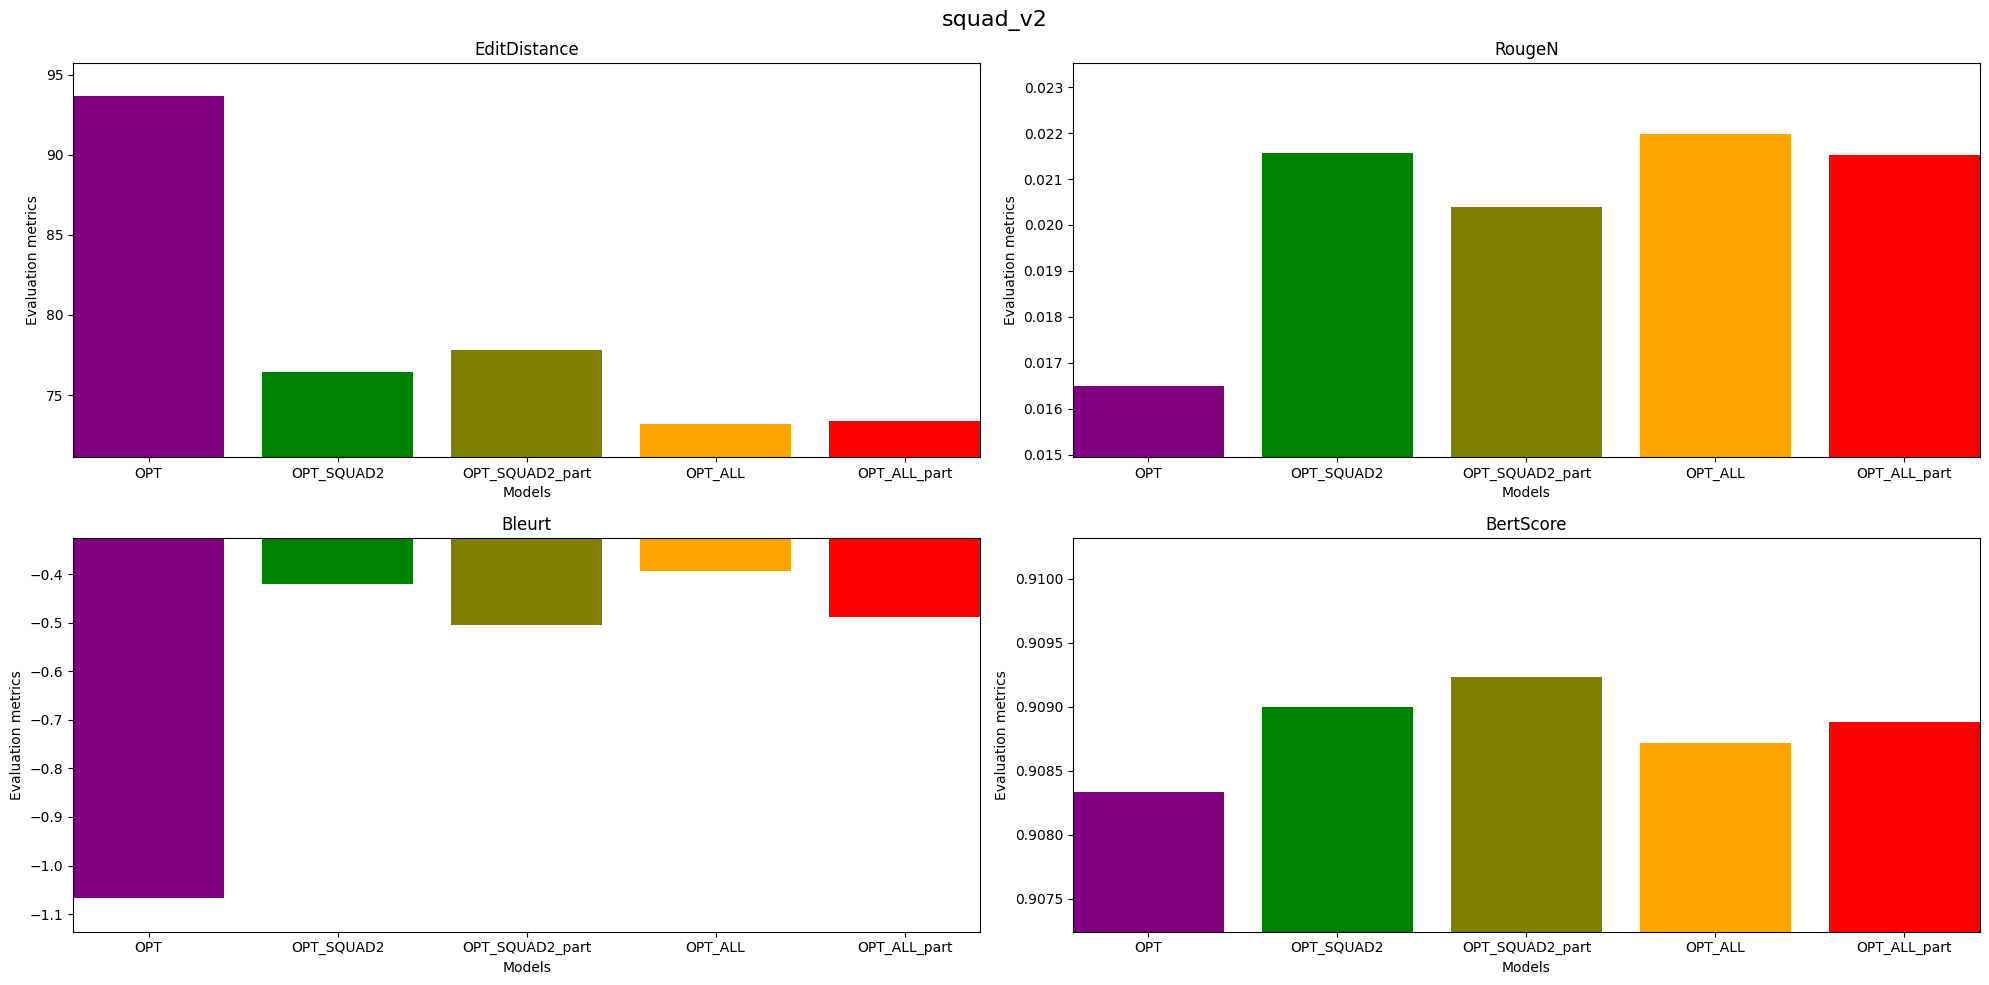

In [ ]:
plot_dataset(squad2, SQUAD_V2, squad_v2_models, metrics_dict, COLORS)

The model OPT_ALL outperformed the others in EditDistance, Bleurt, and RougeN metrics. However, for the BertScore metric, the OPT_SQUAD2_part model emerged as the winner. When considering the average performance across all metrics, the OPT_ALL model proved to be the most effective.

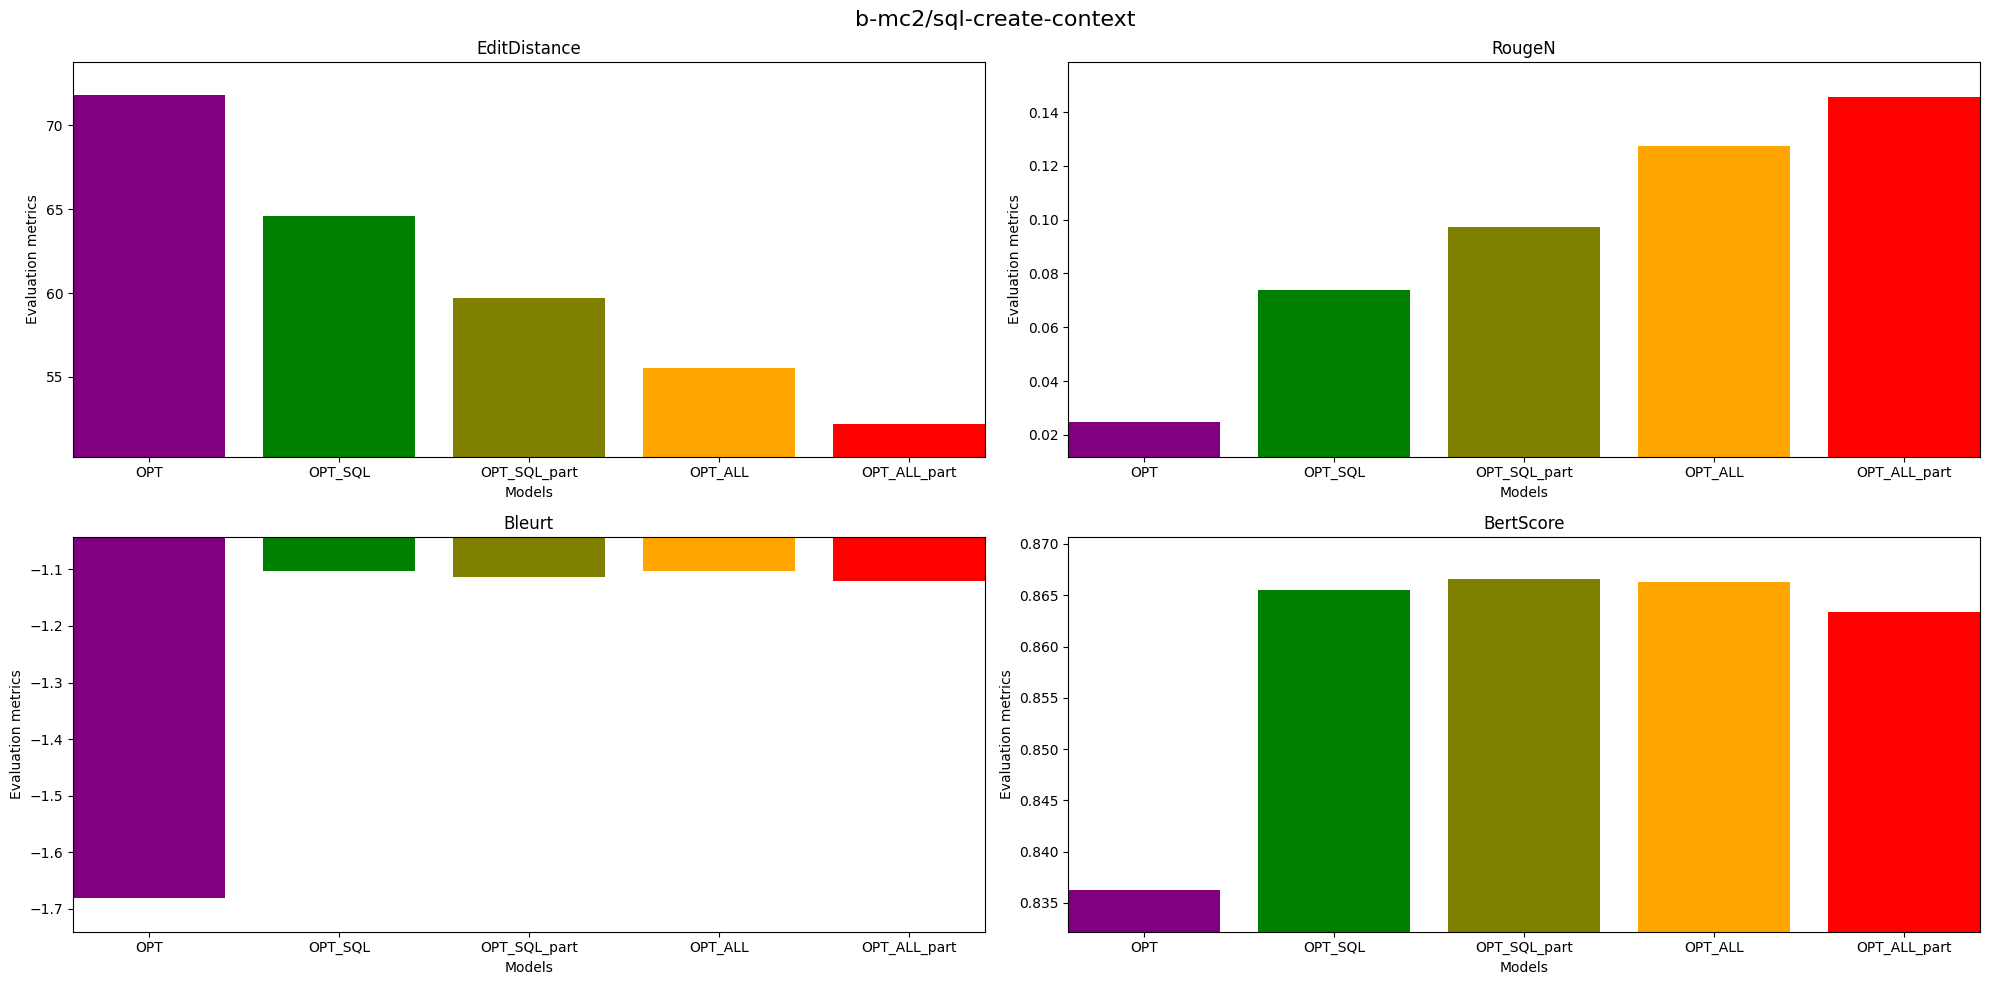

In [ ]:
plot_dataset(sql, SQL_CONTEXT, sql_context_models, metrics_dict, COLORS)

The OPT_ALL_part model excelled in the EditDistance and RougeN metrics, while the OPT_ALL model led in the Bleurt metric. The BertScore metric was dominated by the OPT_SQL_part model. When evaluated on the b-mc2/sql-create-context dataset, the OPT_ALL_part model emerged as the overall winner.

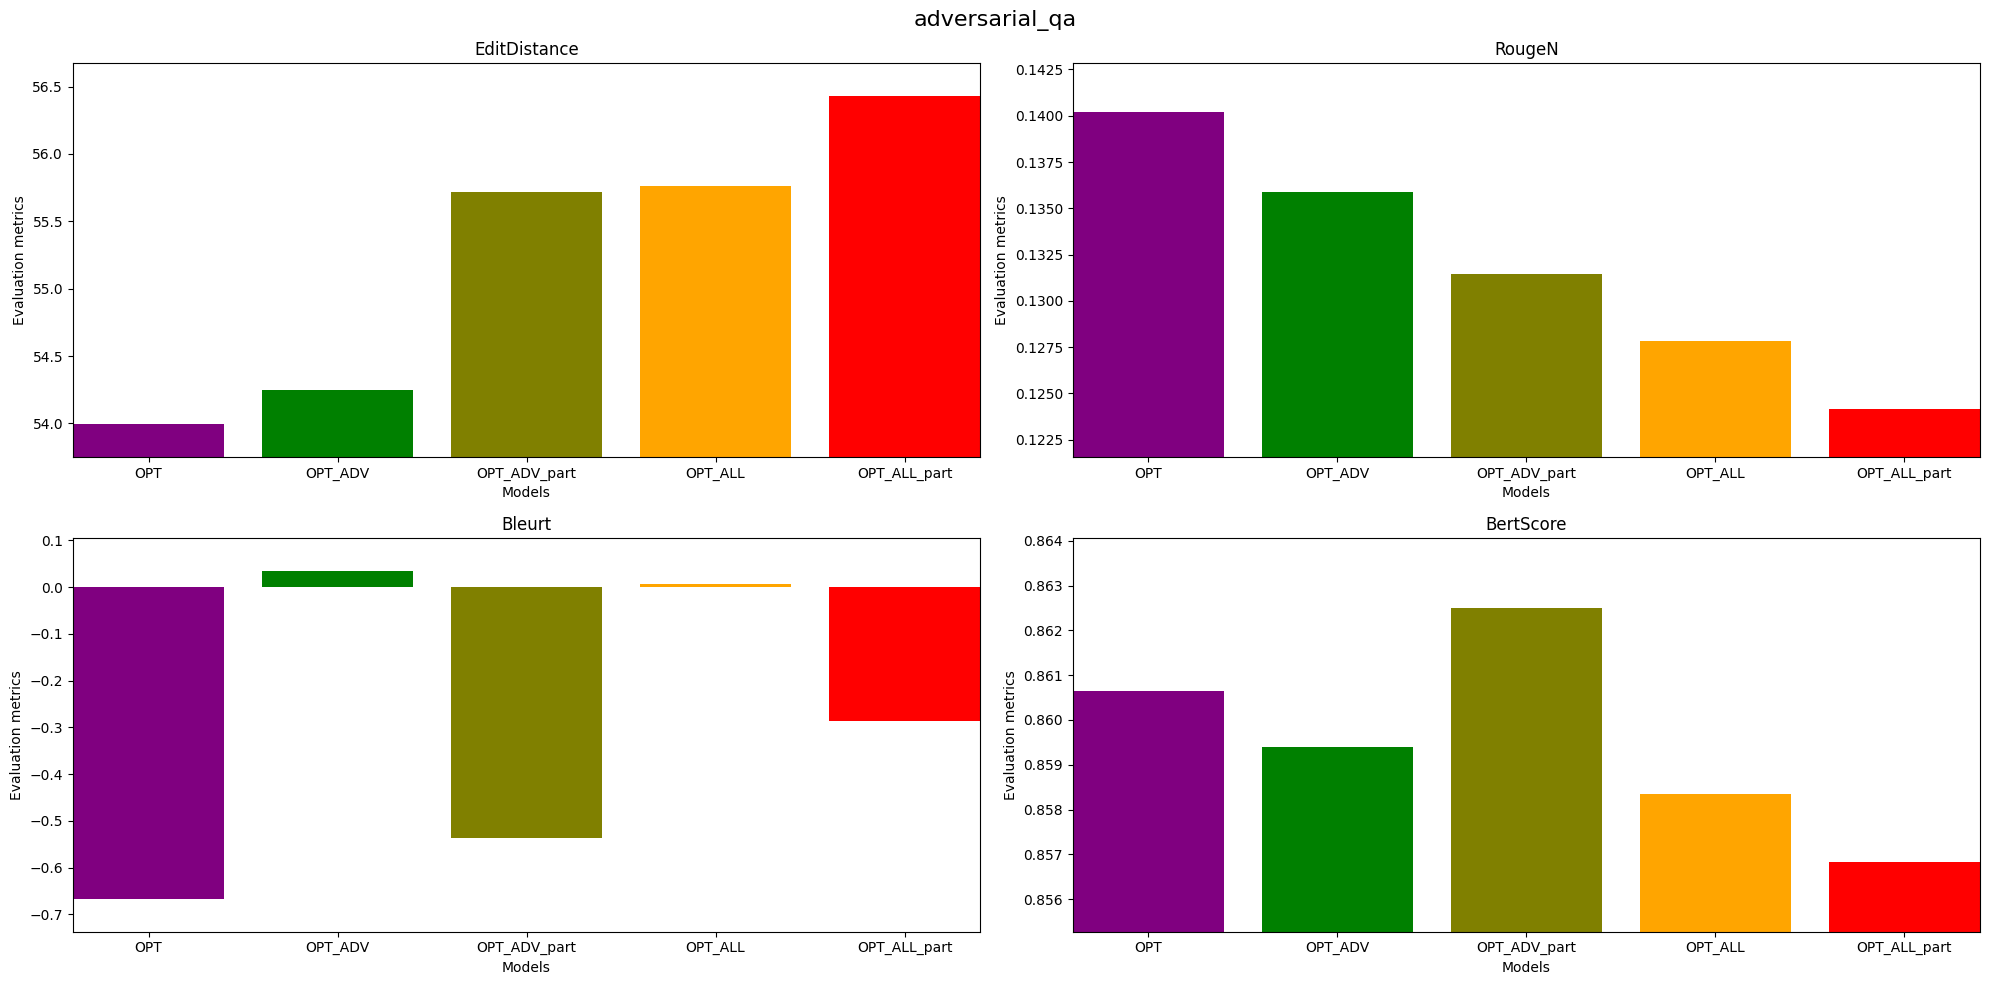

In [ ]:
plot_dataset(adversarial_qa, ADVERSARIAL_QA, adversarial_qa_models, metrics_dict, COLORS)

The OPT model excelled in the EditDistance and RougeN metrics, while the OPT_ADV model led in the Bleurt metric. The BertScore metric was dominated by the OPT_ADV_part model. When evaluated on the adversarial_qa dataset, the OPT_ADV model emerged as the overall winner.

The evaluation of the models across three different datasets reveals that the OPT_ALL model consistently outperforms the others. This superior performance is likely due to the diverse content of the three datasets on which it was trained. The variety in the datasets would have enabled the OPT_ALL model to learn high contextual features, thereby enhancing its predictive capabilities in the question-answering problem.